# Training DL models with default hyperparameters on the IDS2017

In this notebook, different DL models are used on the IDS2018 without hyperparameter optimization to test the performance. Deep neural networks, autoencoders, convolutional networks and RNNs are tested on the dataset.

In [3]:
from utils_ids2018 import load_ids2018, feature_selection
from notebook_utils import plot_confusion_matrix, metrics_report, calculate_metrics_by_label, test_metrics_DL, plot_overall_accuracy
from notebook_utils import test_metrics_AE, test_metrics_AE_new
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

attack_labels = {
    0: 'Benign',
    1: 'Bot',
    2: 'Brute Force -Web',
    3: 'Brute Force -XSS',
    4: 'DDOS attack-HOIC',
    5: 'DDOS attack-LOIC-UDP',
    6: 'DDoS attacks-LOIC-HTTP',
    7: 'DoS attacks-GoldenEye',
    8: 'DoS attacks-Hulk',
    9: 'DoS attacks-SlowHTTPTest',
    10: 'DoS attacks-Slowloris',
    11: 'FTP-BruteForce',
    12: 'Infilteration',
    13: 'SQL Injection',
    14: 'SSH-Bruteforce'
}

## Load Dataset

In [4]:
df = load_ids2018()

Processed 1/10 files.
Processed 2/10 files.
Processed 3/10 files.
Processed 4/10 files.
Processed 5/10 files.
Processed 6/10 files.
Processed 7/10 files.
Processed 8/10 files.
Processed 9/10 files.
Processed 10/10 files.
Creating is_attack column...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623303 entries, 0 to 1623302
Data columns (total 81 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   dst_port           1623295 non-null  float64 
 1   protocol           1623295 non-null  float64 
 2   timestamp          0 non-null        float64 
 3   flow_duration      1623295 non-null  float64 
 4   tot_fwd_pkts       1623295 non-null  float64 
 5   tot_bwd_pkts       1623295 non-null  float64 
 6   totlen_fwd_pkts    1623295 non-null  float64 
 7   totlen_bwd_pkts    1623295 non-null  float64 
 8   fwd_pkt_len_max    1623295 non-null  float64 
 9   fwd_pkt_len_min    1623295 non-null  float64 
 10  fwd_pkt_len_mean   1

In [5]:
X = df.iloc[:, 0:78]
Y = df[["label", "is_attack", "label_code"]]

X.info()
Y.info()
print(Y.label.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1613825 entries, 0 to 1250804
Data columns (total 78 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   dst_port           1613825 non-null  float64
 1   protocol           1613825 non-null  float64
 2   flow_duration      1613825 non-null  float64
 3   tot_fwd_pkts       1613825 non-null  float64
 4   tot_bwd_pkts       1613825 non-null  float64
 5   totlen_fwd_pkts    1613825 non-null  float64
 6   totlen_bwd_pkts    1613825 non-null  float64
 7   fwd_pkt_len_max    1613825 non-null  float64
 8   fwd_pkt_len_min    1613825 non-null  float64
 9   fwd_pkt_len_mean   1613825 non-null  float64
 10  fwd_pkt_len_std    1613825 non-null  float64
 11  bwd_pkt_len_max    1613825 non-null  float64
 12  bwd_pkt_len_min    1613825 non-null  float64
 13  bwd_pkt_len_mean   1613825 non-null  float64
 14  bwd_pkt_len_std    1613825 non-null  float64
 15  flow_byts_s        1613825 non-null  

## Feature Selection

In [6]:
X = feature_selection(X, Y)

              Feature  Information Gain
1       flow_duration          0.233329
11        flow_pkts_s          0.229346
12      flow_iat_mean          0.228733
20         bwd_pkts_s          0.198162
27  init_fwd_win_byts          0.187947
6    fwd_pkt_len_mean          0.187018
4     fwd_pkt_len_max          0.185776
10        flow_byts_s          0.175934
9    bwd_pkt_len_mean          0.163648
7     bwd_pkt_len_max          0.141885
28  init_bwd_win_byts          0.111528
29   fwd_seg_size_min          0.103482
13        bwd_iat_tot          0.097678
16        bwd_iat_max          0.096091
14       bwd_iat_mean          0.095845
15        bwd_iat_std          0.087491
17        bwd_iat_min          0.084194
8     bwd_pkt_len_min          0.073920
5     fwd_pkt_len_min          0.072939
2        tot_fwd_pkts          0.061127
0            protocol          0.059084
3        tot_bwd_pkts          0.053056
32           idle_min          0.046413
30        active_mean          0.029036


## Split Dataset

The dataset is split into a training set and a testing set with a ratio of 0.8/0.2. The dataset is stratified according to the label to have an equal representation of all classes in the 2 subsets.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y.label_code)

In [8]:
Y_train.label.value_counts()

label
Benign                      1070878
DDOS attack-HOIC              55054
DDoS attacks-LOIC-HTTP        46142
DoS attacks-Hulk              37046
Bot                           23007
FTP-BruteForce                15517
SSH-Bruteforce                15007
Infilteration                 12762
DoS attacks-SlowHTTPTest      11223
DoS attacks-GoldenEye          3372
DoS attacks-Slowloris           844
DDOS attack-LOIC-UDP            134
Brute Force -Web                 42
Brute Force -XSS                 22
SQL Injection                    10
Label                             0
Name: count, dtype: int64

In [9]:
Y_test.label.value_counts()

label
Benign                      267720
DDOS attack-HOIC             13763
DDoS attacks-LOIC-HTTP       11536
DoS attacks-Hulk              9261
Bot                           5752
FTP-BruteForce                3879
SSH-Bruteforce                3752
Infilteration                 3190
DoS attacks-SlowHTTPTest      2806
DoS attacks-GoldenEye          843
DoS attacks-Slowloris          211
DDOS attack-LOIC-UDP            34
Brute Force -Web                11
Brute Force -XSS                 5
SQL Injection                    2
Label                            0
Name: count, dtype: int64

Statistics

In [10]:
benign_percentage = len(Y_train.label[Y_train["label"]=="BENIGN"])/len(Y_train)
print('Percentage of benign samples: %.4f' % benign_percentage)
print(Y_train.is_attack.value_counts())

Percentage of benign samples: 0.0000
is_attack
0    1070878
1     220182
Name: count, dtype: int64


## SMOTE Resampling

In [11]:
from imblearn.over_sampling import SMOTE

def resample_dataset(X, Y, min_samples, attack_labels):
    Y = Y.drop(columns=['label'])
    combined = pd.concat([X, Y], axis=1)
    counts = Y['label_code'].value_counts()
    samples_number = {i: max(counts[i], min_samples) for i in np.unique(Y['label_code'])}
    combined_array = combined.values
    y_array = Y['label_code'].values
    resampler = SMOTE(random_state=42, sampling_strategy=samples_number)
    resampled_array, y_resampled = resampler.fit_resample(combined_array, y_array)
    X_resampled = resampled_array[:, :-Y.shape[1]]
    Y_resampled = resampled_array[:, -Y.shape[1]:]
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    Y_resampled_df = pd.DataFrame(Y_resampled, columns=Y.columns)
    Y_resampled_df['label'] = Y_resampled_df['label_code'].map(attack_labels)
    Y_resampled_df['label'] = Y_resampled_df['label'].astype('category')
    return X_resampled_df, Y_resampled_df

X_smote_train, Y_smote_train = resample_dataset(X_train, Y_train, 100000, attack_labels)


In [12]:
Y_smote_train.label.value_counts()

label
Benign                      1070878
Bot                          100000
Brute Force -Web             100000
Brute Force -XSS             100000
DDOS attack-HOIC             100000
DDOS attack-LOIC-UDP         100000
DDoS attacks-LOIC-HTTP       100000
DoS attacks-GoldenEye        100000
DoS attacks-Hulk             100000
DoS attacks-SlowHTTPTest     100000
DoS attacks-Slowloris        100000
FTP-BruteForce               100000
Infilteration                100000
SSH-Bruteforce               100000
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_smote = StandardScaler()
scaler_smote.fit(X_smote_train)

StandardScaler()

In [14]:
# Save the model
def save_model(model, model_name):
    # Create directory if it does not exist
    model_dir = os.path.join("models", "DL_models_default_2018")
    os.makedirs(model_dir, exist_ok=True)
    # Save the model
    model.save(os.path.join(model_dir, f"{model_name}.keras"))

## DNN

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM, TimeDistributed, RepeatVector, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

metrics = {}

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 39s 622us/step - accuracy: 0.9754 - loss: 0.0884 - val_accuracy: 0.5729 - val_loss: 1.6724
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 40s 646us/step - accuracy: 0.9853 - loss: 0.0572 - val_accuracy: 0.5725 - val_loss: 1.7610
Epoch 3/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 39s 628us/step - accuracy: 0.9863 - loss: 0.0517 - val_accuracy: 0.5791 - val_loss: 1.7600
Epoch 4/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 39s 623us/step - accuracy: 0.9873 - loss: 0.0707 - val_accuracy: 0.4751 - val_loss: 1.8419
10087/10087 ━━━━━━━━━━━━━━━━━━━━ 4s 434us/step
Classification Report (Test DNN (SMOTE)):
              precision    recall  f1-score   support

           0     0.9800    0.9984    0.9891    267720
           1     0.9912    0.9007    0.9438     55045

    accuracy                         0.9817    322765
   macro avg     0.9856    0.9495    0.9664    322765
weighted avg     0.9819    0.9817    0.9813    322765

Accuracy: 0.9816987591591405
Precision: 0.98

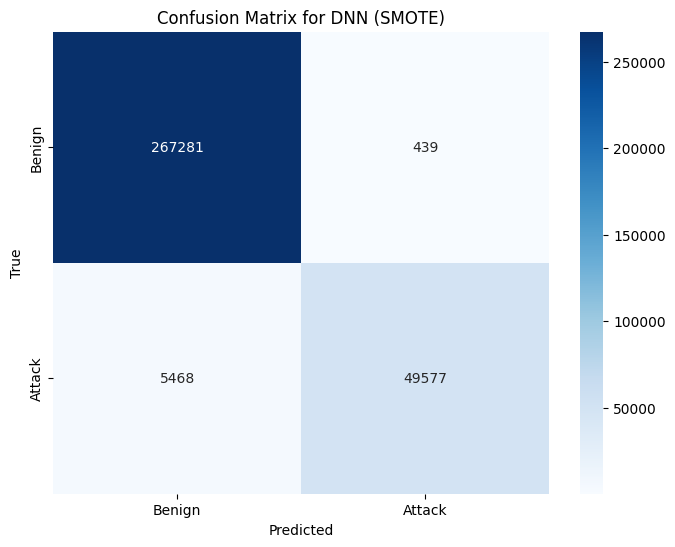

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.998360  SMOTE
1                        Bot  0.951147  SMOTE
2             SSH-Bruteforce  0.502132  SMOTE
3           DDOS attack-HOIC  0.999782  SMOTE
4           DoS attacks-Hulk  1.000000  SMOTE
5   DoS attacks-SlowHTTPTest  1.000000  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7     DDoS attacks-LOIC-HTTP  0.993239  SMOTE
8              Infilteration  0.006270  SMOTE
9      DoS attacks-GoldenEye  0.994069  SMOTE
10     DoS attacks-Slowloris  0.706161  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -Web  1.000000  SMOTE
13             SQL Injection  0.500000  SMOTE
14          Brute Force -XSS  1.000000  SMOTE


In [16]:
# Define DNN model
def create_dnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate DNN model
dnn_model = create_dnn_model(X_smote_train.shape[1])
dnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
              validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate and save the model
metrics["DNN"] = test_metrics_DL("DNN", dnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(dnn_model, "DNN_SMOTE")


## CNN

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 46s 725us/step - accuracy: 0.9718 - loss: 0.1041 - val_accuracy: 0.5776 - val_loss: 1.6808
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 44s 712us/step - accuracy: 0.9845 - loss: 0.0768 - val_accuracy: 0.6438 - val_loss: 1.4052
Epoch 3/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 723us/step - accuracy: 0.9866 - loss: 0.1074 - val_accuracy: 0.5915 - val_loss: 1.5357
Epoch 4/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 724us/step - accuracy: 0.9887 - loss: 0.0561 - val_accuracy: 0.5981 - val_loss: 1.5807
Epoch 5/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 44s 713us/step - accuracy: 0.9893 - loss: 0.0441 - val_accuracy: 0.5905 - val_loss: 1.7498
10087/10087 ━━━━━━━━━━━━━━━━━━━━ 5s 478us/step
Classification Report (Test CNN (SMOTE)):
              precision    recall  f1-score   support

           0     0.9870    0.9976    0.9923    267720
           1     0.9876    0.9361    0.9612     55045

    accuracy                         0.9871    322765
   macro avg     0

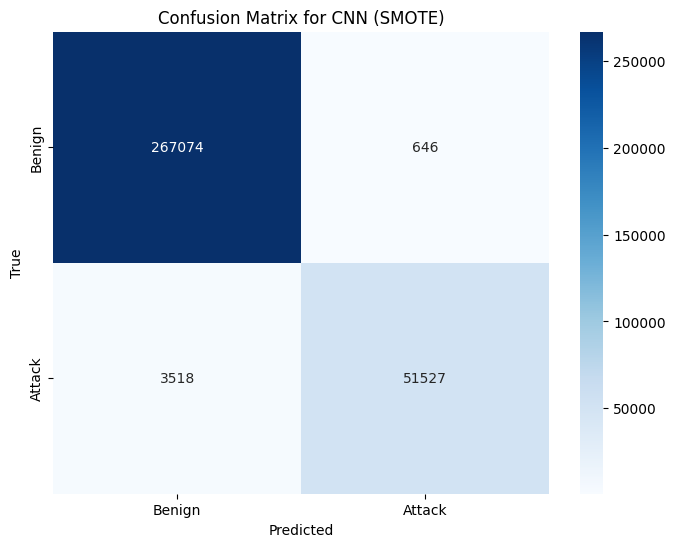

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.997587  SMOTE
1                        Bot  0.951321  SMOTE
2             SSH-Bruteforce  1.000000  SMOTE
3           DDOS attack-HOIC  1.000000  SMOTE
4           DoS attacks-Hulk  1.000000  SMOTE
5   DoS attacks-SlowHTTPTest  1.000000  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7     DDoS attacks-LOIC-HTTP  0.994799  SMOTE
8              Infilteration  0.018495  SMOTE
9      DoS attacks-GoldenEye  1.000000  SMOTE
10     DoS attacks-Slowloris  0.781991  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -Web  1.000000  SMOTE
13             SQL Injection  0.500000  SMOTE
14          Brute Force -XSS  1.000000  SMOTE


In [17]:
# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate CNN model
cnn_model = create_cnn_model((X_smote_train.shape[1], 1))

history = cnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
                        validation_split=0.2, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate and save the model
metrics["CNN"] = test_metrics_DL("CNN", cnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(cnn_model, "CNN_SMOTE")


## RNN

In [ ]:
# Define RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate RNN model
rnn_model = create_rnn_model((X_smote_train.shape[1], 1))
rnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
              validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 277s 4ms/step - accuracy: 0.9574 - loss: 0.1115 - val_accuracy: 0.5834 - val_loss: 1.5575
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 289s 5ms/step - accuracy: 0.9846 - loss: 0.0559 - val_accuracy: 0.5849 - val_loss: 1.6222
Epoch 3/10
 8157/61772 ━━━━━━━━━━━━━━━━━━━━ 3:58 4ms/step - accuracy: 0.9872 - loss: 0.0495

In [ ]:
# Evaluate and save the model
metrics["RNN"] = test_metrics_DL("RNN", rnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(rnn_model, "RNN_SMOTE")

## Autoencoder

In [ ]:
# Filter the training data to include only benign samples
benign_data = X_train[Y_train['is_attack'] == 0]

# Standardize the benign data
scaler_AE = StandardScaler()
scaler_AE.fit(benign_data)

# Define Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate Autoencoder model
autoencoder_model = create_autoencoder_model(benign_data.shape[1])
autoencoder_model.fit(scaler_AE.transform(benign_data), scaler_AE.transform(benign_data), epochs=10, batch_size=32, 
                      validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


In [ ]:
# Evaluate and save the model
from notebook_utils import test_metrics_AE
metrics["AE"] = test_metrics_AE("AE", autoencoder_model, scaler_AE, X_test, Y_test, 90)
save_model(autoencoder_model, "AE_SMOTE")

In [ ]:
from tensorflow.keras import Model, layers

# Filter the training data to include only benign samples
benign_data = X_train[Y_train['is_attack'] == 0]

# Standardize the benign data
scaler_AE = StandardScaler()
scaler_AE.fit(benign_data)

class AnomalyDetector(Model):
    def __init__(self, input_shape):
        super(AnomalyDetector, self).__init__()
        self.encoder = Sequential([
            layers.Dense(256, activation="relu", input_shape=(input_shape,)),
            layers.Dense(128, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(input_shape, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_shape = benign_data.shape[1]
autoencoder = AnomalyDetector(input_shape)
autoencoder.compile(optimizer='adam', loss='mae')

history = autoencoder.fit(scaler_AE.transform(benign_data), scaler_AE.transform(benign_data),
                          epochs=50, batch_size=512, validation_split=0.2, shuffle=True,
                          callbacks=[EarlyStopping(monitor='loss', patience=5)])

reconstructions = autoencoder.predict(scaler_AE.transform(benign_data))
train_loss = np.mean(np.abs(scaler_AE.transform(benign_data) - reconstructions), axis=1)

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

In [ ]:
# Evaluate and save the model
from notebook_utils import test_metrics_AE
metrics["AE"] = test_metrics_AE_new("AE", autoencoder_model, scaler_AE, X_test, Y_test, threshold)
save_model(autoencoder_model, "AE_SMOTE")